In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Ad Click Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [ ]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [ ]:
df['Daily Time Spent on Site'].fillna((df['Daily Time Spent on Site'].mean()),inplace=True)

In [ ]:
df['Area Income'].fillna((df['Area Income'].mean()),inplace=True)

In [ ]:
df['Daily Internet Usage'].fillna((df['Daily Internet Usage'].mean()),inplace=True)

In [ ]:
malemode=df['Male'].mode()
malemode
df['Male'].value_counts()


0.0    518
1.0    479
Name: Male, dtype: int64

In [ ]:
df['Male'].fillna('0.0',inplace=True)

In [ ]:
citymode=df['City'].mode()
df['City'].fillna(citymode,inplace=True)

In [ ]:
countrymode=df['Country'].mode()
countrymode

0    Czech Republic
1            France
dtype: object

In [ ]:
df['Country'].fillna('Czech Republic',inplace=True)

In [ ]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        1
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


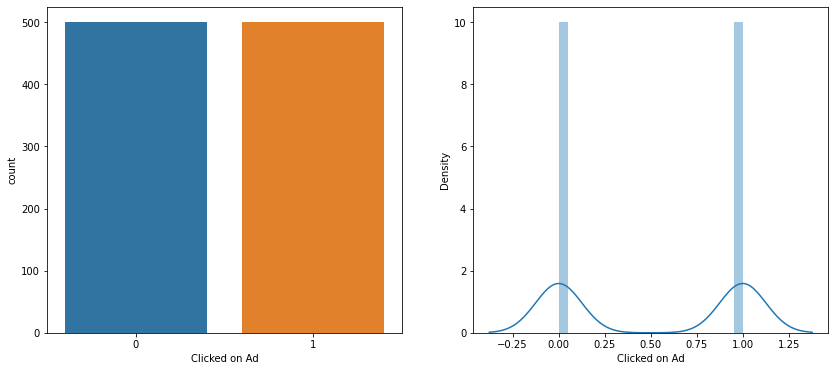

In [ ]:
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'Clicked on Ad', data = df)
plt.subplot(1,2,2)
sns.distplot(df["Clicked on Ad"], bins = 20)
plt.show()

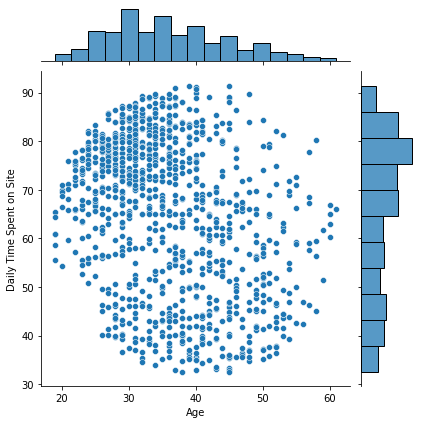

In [ ]:
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = df) 

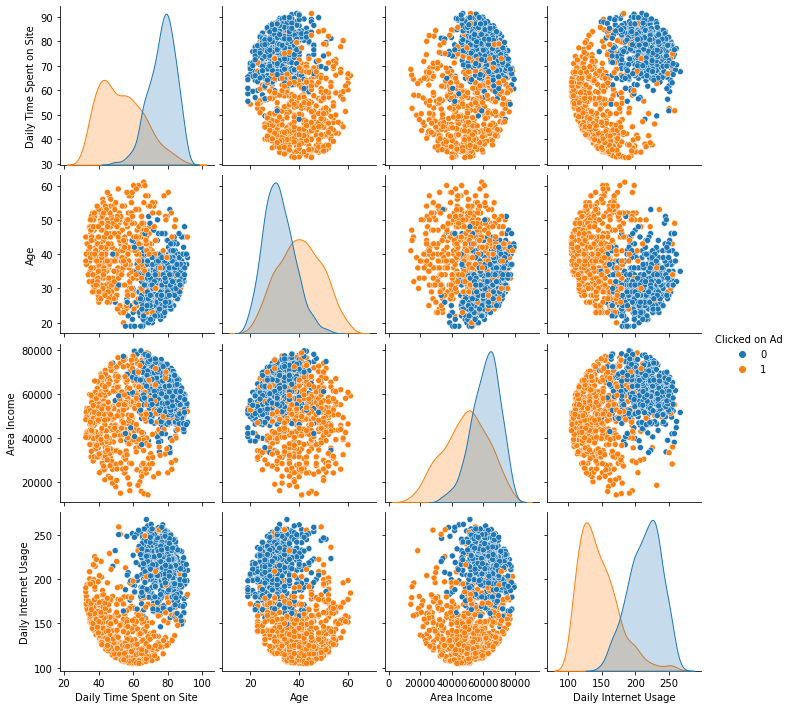

In [ ]:
sns.pairplot(df, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'])

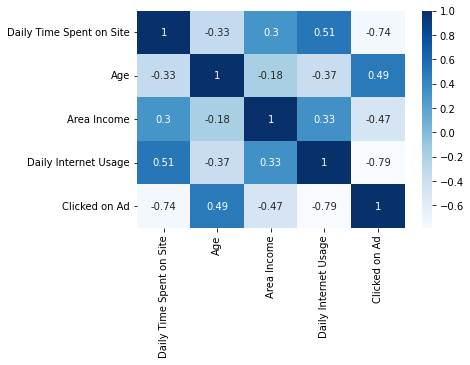

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', annot = True)

Daily internet usage and daily time spent on site have a significant correlation than rest

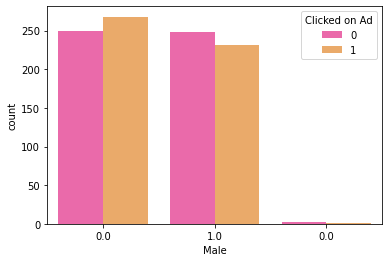

In [ ]:
sns.countplot(x='Male',hue='Clicked on Ad',data=df,palette='spring')

Female click on Ads more than male

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


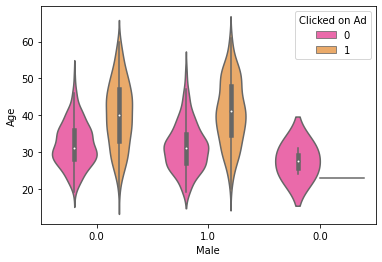

In [ ]:
sns.violinplot("Male","Age", hue= "Clicked on Ad", data=df,palette="spring")

In [ ]:
#df['Age_bins'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 70], labels=['Young','Adult','Mid', 'Elder'])

In [ ]:
#sns.countplot('Age_bins',hue='Clicked on Ad',data= df)

In [ ]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix=confusion_matrix(y_test, y_pred)
cf_matrix

array([[155,   9],
       [ 12, 124]])

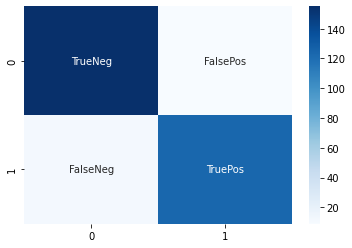

In [ ]:
labels = ['TrueNeg','FalsePos','FalseNeg','TruePos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels,fmt='', cmap='Blues')